# Objective
- To extract keywords from the 15th of March to the 12th of May 2020
- To plot 25 keywords with the most frequency

In [1]:
#packages we will need to achieve our objectives
import pandas as pd
import utils

[nltk_data] Downloading package stopwords to /home/yas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#fetching our data
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
df.head(1)

,Unnamed: 0,id,username,text,created_at,date,retweets,hashtags,geo,Sentiment,SentimentClass
0,0,1260707670950137856,COVID19_bot,"Evolution of cases in Botswana, Burundi, Centr...",2020-05-13 23:05:06+00:00,2020-05-13,1,NaN,NaN,0.133333,Positive


In [3]:
#renaming the date column to created_at
df['created_at'] =  pd.to_datetime(df['date'])
#extracting the date from the created at column and making a date column
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df.head(1)

,Unnamed: 0,id,username,text,created_at,date,retweets,hashtags,geo,Sentiment,SentimentClass
0,0,1260707670950137856,COVID19_bot,"Evolution of cases in Botswana, Burundi, Centr...",2020-05-13,2020-05-13,1,NaN,NaN,0.133333,Positive


In [40]:
#Words we dont regard as keywords
meanless_words=['rt','help','day','bit','virus','fight','pandemic','angola','corona','read','world', \
                    'due','deaths','http','https','amid','time','via','www','people','amp','dr','com','today','health', \
                    'minister','covid_19','countries','covid-19','zambia','covid','coronavirus', \
                   'cases','new','last','recorded','update','24hrs','test','covid19','na','ya','wa','p', \
                    'one','us','mwebantu','confirmed','number','tested','positive','one','igshid', \
                    'done','public','tests','recorded','case','records','active','know','ghana','get', \
                    'like','says','stands','total','need','free','namibia','first','still','two', 'hours',
                    'botswana','let','burundi','may', 'central' ,'african','republic','country', 'cote','ivoire', \
                    'eritrea','tests','ethiopia','ly', 'kenya', 'malawi','zimbabwe','news', 'mozambique', \
                    'namibia','rwanda','president','south','nigeria','chitalu','facebook','town','africa', \
                    '100th','eswatini','recorded','uganda','must','also','instagram','covid19zambia','zambia','southafrica']


#Extracting only the text column from the tweets
tweet_txt=df["text"]

#Merging the entire text column so it becomes one corpus
merged_text_col=utils.merge_df_col_val(tweet_txt)

#Removing the RT username from the tweets
remove_RT_from_text=utils.remove_RT(merged_text_col)

#Removing all punctuation marks from the tweets
punct_rmvd_from_txt=utils.remove_punct_marks(merged_text_col)

#removing works that have no meaning such as is, as , the from the text
stp_wrds_rmvd_from_txt=utils.remove_stop_words(punct_rmvd_from_txt)

#Removing the words that have meaning but not considered keywords
meanless_wrds_rmvd_from_txt=utils.remove_meaninglesswords(stp_wrds_rmvd_from_txt,meanless_words)

#Removing numbers frm the text
rmv_numbers_from_txt=utils.remove_numeric(meanless_wrds_rmvd_from_txt)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
words=rmv_numbers_from_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,tanzania,415
1,lusaka,256
2,death,246
3,zambian,213
4,border,204


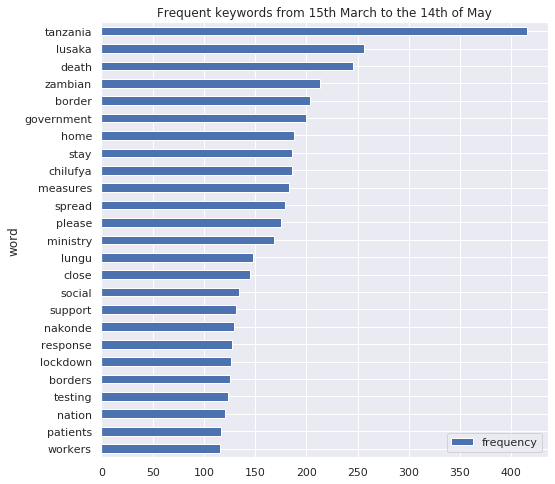

In [46]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent keywords from 15th March to the 14th of May")
plt.show()
plt.savefig("images/full.png")
plt.close()